In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

### Create empty data frame

In [2]:
golf_df = pd.DataFrame() #this is a variable golf dataframe, to create an empty dataframe ()

In [3]:
# add outlook
golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
                     'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
                     'overcast', 'rainy']

#add temperature
golf_df['Temperature'] = [92, 86, 83, 70, 60, 53, 62,
                         75, 57, 72, 78, 69, 81, 71]

#add humidity
golf_df['Humidity'] = [40.3, 63.1, 35.3, 86.3, 72.4, 22.7, 27.0,
                      80.7, 15.4, 25.1, 18.6, 58.3, 27.2, 39.3]

#add windy
golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
                   'false', 'false', 'false', 'true', 'true', 'false', 'true']

#finally add play
golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
                  'yes', 'yes', 'no']

In [4]:
golf_df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,92,40.3,false,no
1,sunny,86,63.1,true,no
2,overcast,83,35.3,false,yes
3,rainy,70,86.3,false,yes
4,rainy,60,72.4,false,yes
5,rainy,53,22.7,true,no
6,overcast,62,27.0,true,yes
7,sunny,75,80.7,false,no
8,sunny,57,15.4,false,yes
9,rainy,72,25.1,false,yes


## Process data

In [5]:
one_hot_data = pd.get_dummies(golf_df[['Outlook', 'Windy']])

In [6]:
one_hot_data

,Outlook_overcast,Outlook_rainy,Outlook_sunny,Windy_false,Windy_true
0,0,0,1,1,0
1,0,0,1,0,1
2,1,0,0,1,0
3,0,1,0,1,0
4,0,1,0,1,0
5,0,1,0,0,1
6,1,0,0,0,1
7,0,0,1,1,0
8,0,0,1,1,0
9,0,1,0,1,0


## All of it together

In [7]:
golf_one_hot = golf_df[['Temperature', 'Humidity']].join(one_hot_data)

In [8]:
golf_one_hot

,Temperature,Humidity,Outlook_overcast,Outlook_rainy,Outlook_sunny,Windy_false,Windy_true
0,92,40.3,0,0,1,1,0
1,86,63.1,0,0,1,0,1
2,83,35.3,1,0,0,1,0
3,70,86.3,0,1,0,1,0
4,60,72.4,0,1,0,1,0
5,53,22.7,0,1,0,0,1
6,62,27.0,1,0,0,0,1
7,75,80.7,0,0,1,1,0
8,57,15.4,0,0,1,1,0
9,72,25.1,0,1,0,1,0


## Create Model

In [9]:
model = RandomForestClassifier(n_estimators=10,  random_state=7)

In [10]:
model.fit(golf_one_hot, golf_df['Play'])

RandomForestClassifier(n_estimators=10, random_state=7)

In [11]:
model.predict([[100, 18, 1, 0, 0, 1, 0]])

array(['yes'], dtype=object)

In [12]:
model.predict(golf_one_hot)

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

In [13]:
golf_df['Play'].values

array(['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no'], dtype=object)

## Most important features

In [14]:
from sklearn.inspection import permutation_importance

In [15]:
result = permutation_importance(model, golf_one_hot, golf_df['Play'], n_repeats=10,
                                random_state=7)
result

{'importances_mean': array([0.        , 0.17857143, 0.        , 0.        , 0.17142857,
        0.02857143, 0.02857143]),
 'importances_std': array([0.        , 0.09715336, 0.        , 0.        , 0.07953949,
        0.03499271, 0.03499271]),
 'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.07142857, 0.07142857, 0.35714286, 0.14285714, 0.07142857,
         0.14285714, 0.21428571, 0.28571429, 0.14285714, 0.28571429],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.14285714, 0.07142857, 0.28571429, 0.21428571, 0.14285714,
         0.07142857, 0.21428571, 0.21428571, 0.28571429, 0.07142857],
        [0.07142857, 0.        , 0.        , 0.

In [16]:
perm_sorted_idx = result.importances_mean.argsort()

In [17]:
tree_importance_sorted_idx = np.argsort(model.feature_importances_)

In [18]:
model.feature_importances_

array([0.21207176, 0.21578693, 0.08366667, 0.07388889, 0.24097558,
       0.1039435 , 0.06966667])

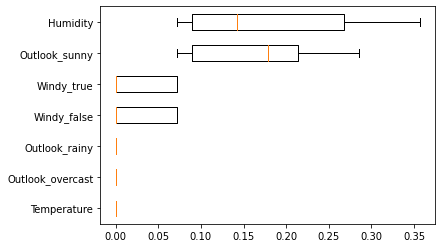

In [19]:
import matplotlib.pyplot as plt
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=golf_one_hot.columns[perm_sorted_idx]);

## Visualize tree

In [20]:
from sklearn import tree


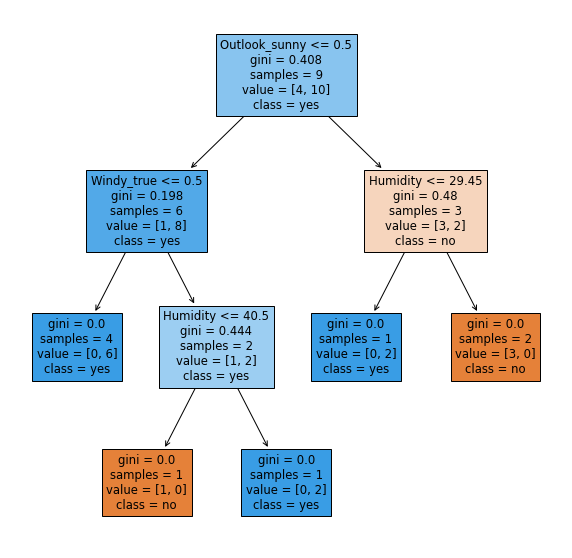

In [21]:
plt.figure(figsize=(10, 10))
tree.plot_tree(model.estimators_[0],
               feature_names = golf_one_hot.columns, 
               class_names=['no', 'yes'],
               filled = True);
#Yes left, #No Right